## OCT Playground
Sandbox to play around with the different OCT Deep Learning Applications

In [1]:
### Init

# Show Resources
!nvidia-smi

# Auto reload
%load_ext autoreload
%autoreload 2

# Imports
from experiment import Experiment

Mon Sep 20 07:55:37 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Quadro RTX 8000     Off  | 00000000:15:00.0 Off |                  Off |
| 33%   27C    P8    16W / 260W |      0MiB / 48601MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

wandb: Currently logged in as: sgvdan (use `wandb login --relogin` to force relogin)


In [17]:
### Parameters
config = {'train_path': {'control': 'tmp-data/train/control', 'study': 'tmp-data/train/study'},
          'test_path': {'control': 'tmp-data/test/control', 'study': 'tmp-data/test/study'},
            
          'input_size': (496, 1024), # Some samples are (496, 512)
          'model_name': 'vgg19_nominal',
          'epochs': 5,
          'lr': 1e-4,
          'batch_size': 50,

          'device': 'cuda',
          }
### Playground
print(config)

experiment = Experiment(config)
experiment.run()

  0%|          | 0/2 [00:00<?, ?it/s]

{'train_path': {'control': 'tmp-data/train/control', 'study': 'tmp-data/train/study'}, 'test_path': {'control': 'tmp-data/test/control', 'study': 'tmp-data/test/study'}, 'input_size': (496, 1024), 'model_name': 'vgg19_nominal', 'epochs': 5, 'lr': 0.0001, 'batch_size': 50, 'device': 'cuda'}
Load Control


  0%|          | 0/3 [00:00<?, ?it/s]

Load Study
SICK:tmp-data/train/study/DR_00385/DR_00385.E2E
SICK:tmp-data/train/study/DR_00385/DR_00385.E2E/DR_0001D.E2E


 67%|██████▋   | 2/3 [00:03<00:01,  1.92s/it]

SICK:tmp-data/train/study/DR_00385/DR_00385.E2E/DR_0002D.E2E


100%|██████████| 3/3 [00:06<00:00,  2.21s/it]


TypeError: only integer tensors of a single element can be converted to an index

SICK


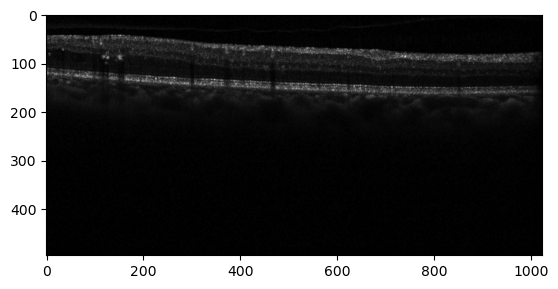

1


In [26]:
###### from oct_converter.image_types import FundusImageWithMetaData, OCTVolumeWithMetaData

import matplotlib.pyplot as plt
a=data[5400]
print('HEALTHY' if a[1] == 0 else 'SICK')
plt.figure
plt.imshow(a[0], cmap='gray')
plt.show()
print(a[1])